[View in Colaboratory](https://colab.research.google.com/github/sanattaori/kmeans/blob/master/dominant_color_case_study.ipynb)

In [0]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving image.png to image (1).png
User uploaded file "image.png" with length 46220 bytes


In [3]:
image = cv2.imread('image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(252, 249, 3)

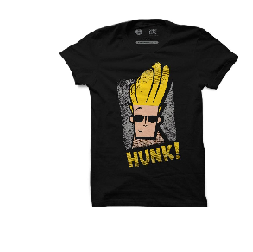

In [4]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [5]:
image.shape


(252, 249, 3)

In [6]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image)
print (image.shape)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(62748, 3)


In [7]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:

#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print(label)

[0.42610123031809777, 0.5060081596226175, 0.06789061005928476]


In [9]:
!pip install webcolors==1.8.1

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


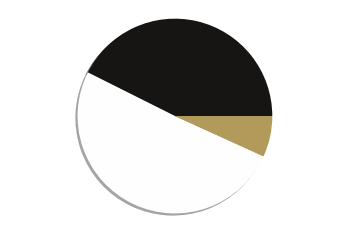

In [10]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()